In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)










/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
data= pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:


data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:

data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

# **Exploratory Data Analysis**

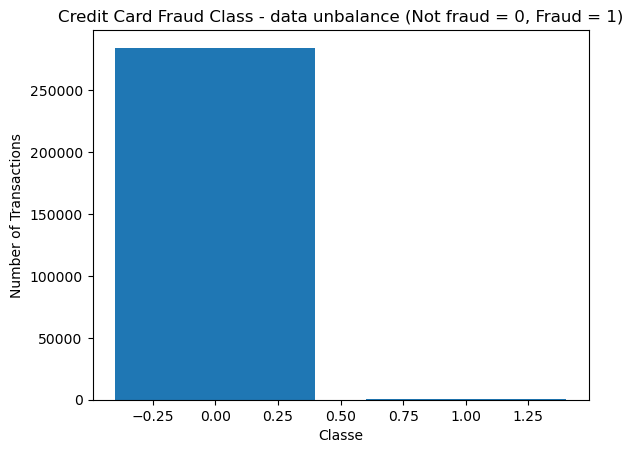

In [8]:
target_counts = data["Class"].value_counts()

# Create a bar plot
plt.bar(target_counts.index, target_counts.values)

# Set the x-axis label
plt.xlabel('Classe')

# Set the y-axis label
plt.ylabel('Number of Transactions')

# Set the plot title
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)')

# Show the plot
plt.show()


In [9]:

class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [10]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


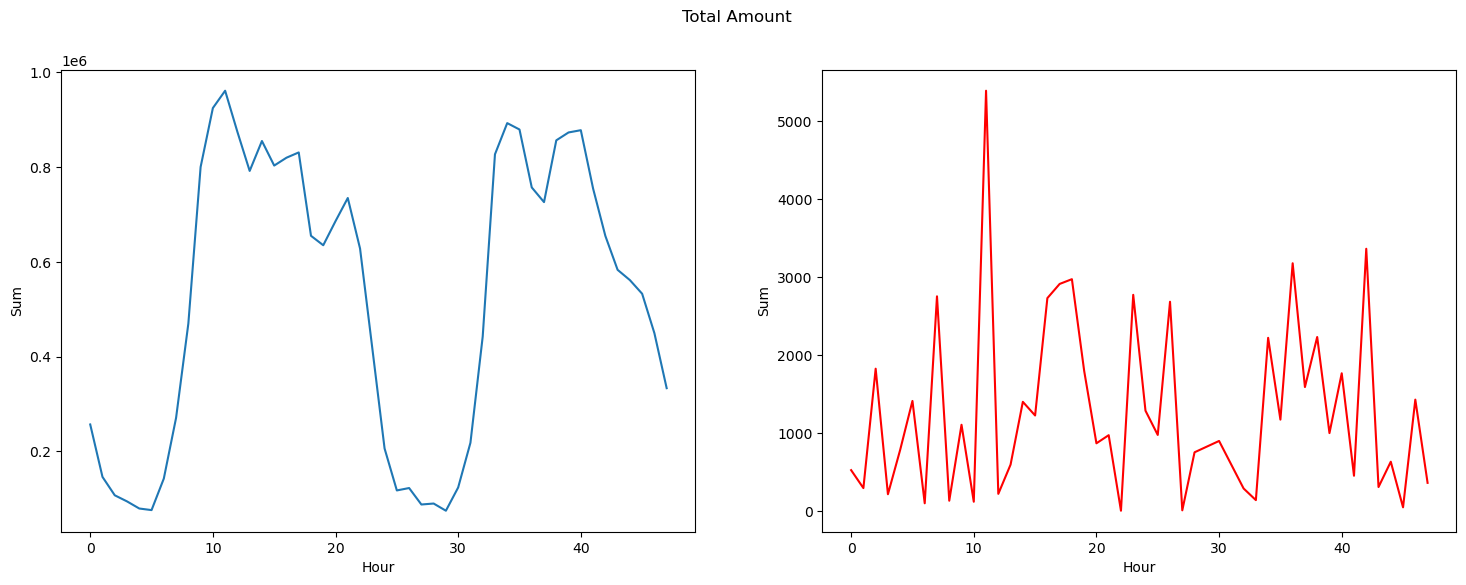

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

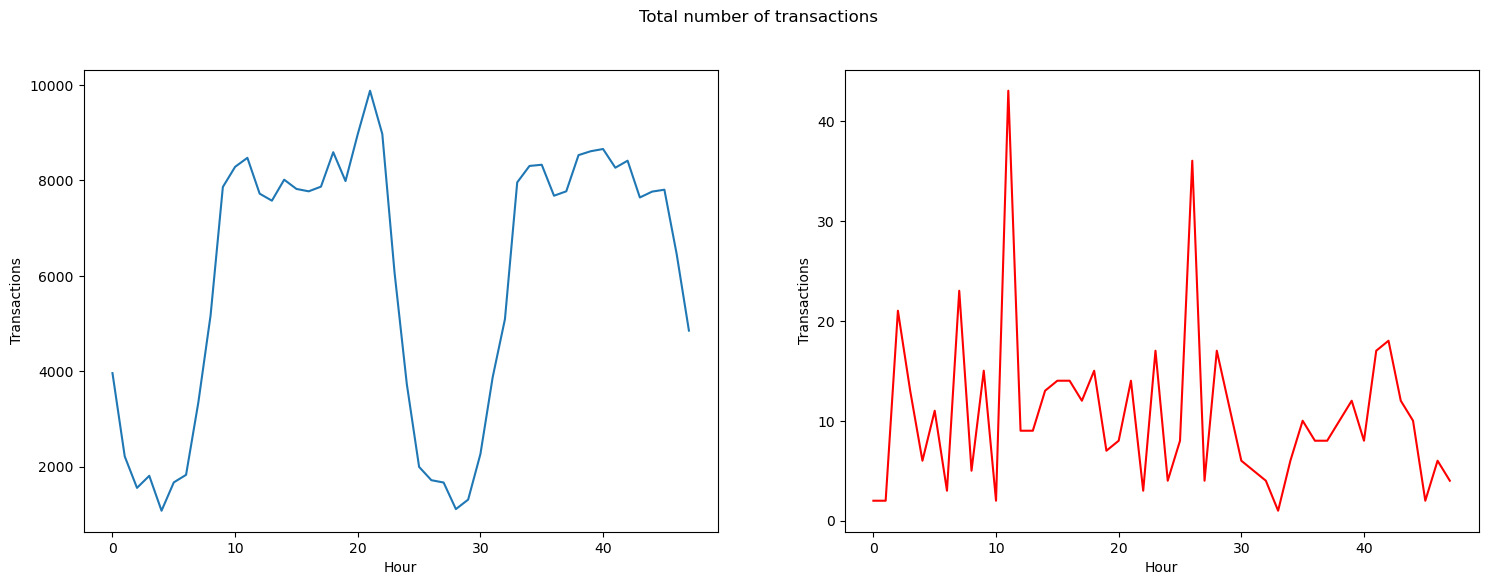

In [12]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (18,6))
s = sns.lineplot(ax=ax1,x = 'Hour',y = 'Transactions',data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2,x = 'Hour',y = 'Transactions',data=df.loc[df.Class==1],color = 'red')
plt.suptitle('Total number of transactions')
plt.show()

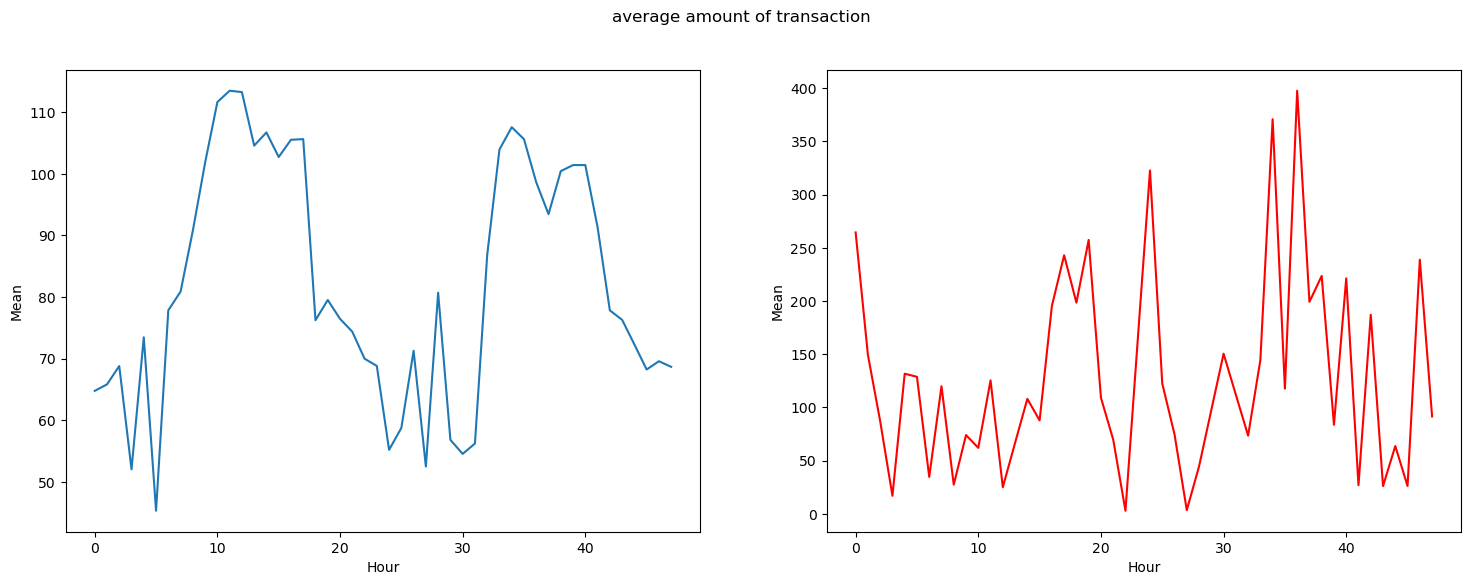

In [13]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (18,6))
s = sns.lineplot(ax=ax1,x = 'Hour',y = 'Mean',data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2,x = 'Hour',y = 'Mean',data=df.loc[df.Class==1],color = 'red')
plt.suptitle('average amount of transaction')
plt.show()

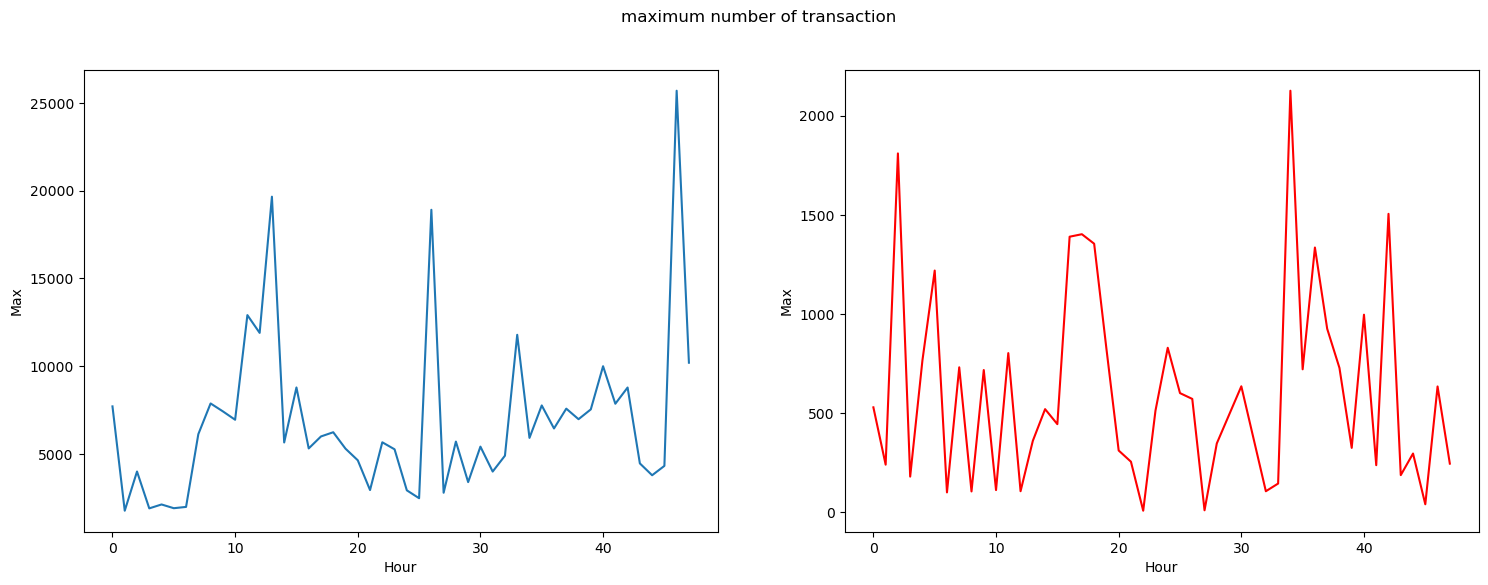

In [14]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (18,6))
s = sns.lineplot(ax=ax1,x = 'Hour',y = 'Max',data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2,x = 'Hour',y = 'Max',data=df.loc[df.Class==1],color = 'red')
plt.suptitle('maximum number of transaction')
plt.show()

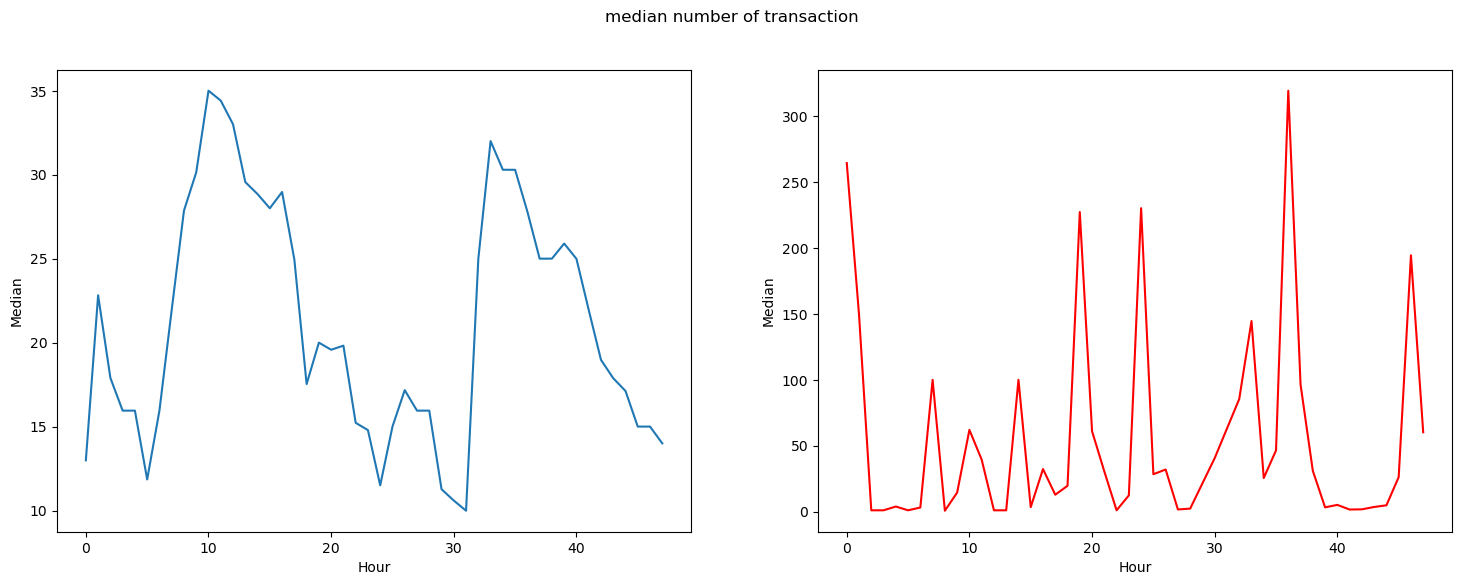

In [15]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (18,6))
s = sns.lineplot(ax=ax1,x = 'Hour',y = 'Median',data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2,x = 'Hour',y = 'Median',data=df.loc[df.Class==1],color = 'red')
plt.suptitle('median number of transaction')
plt.show()


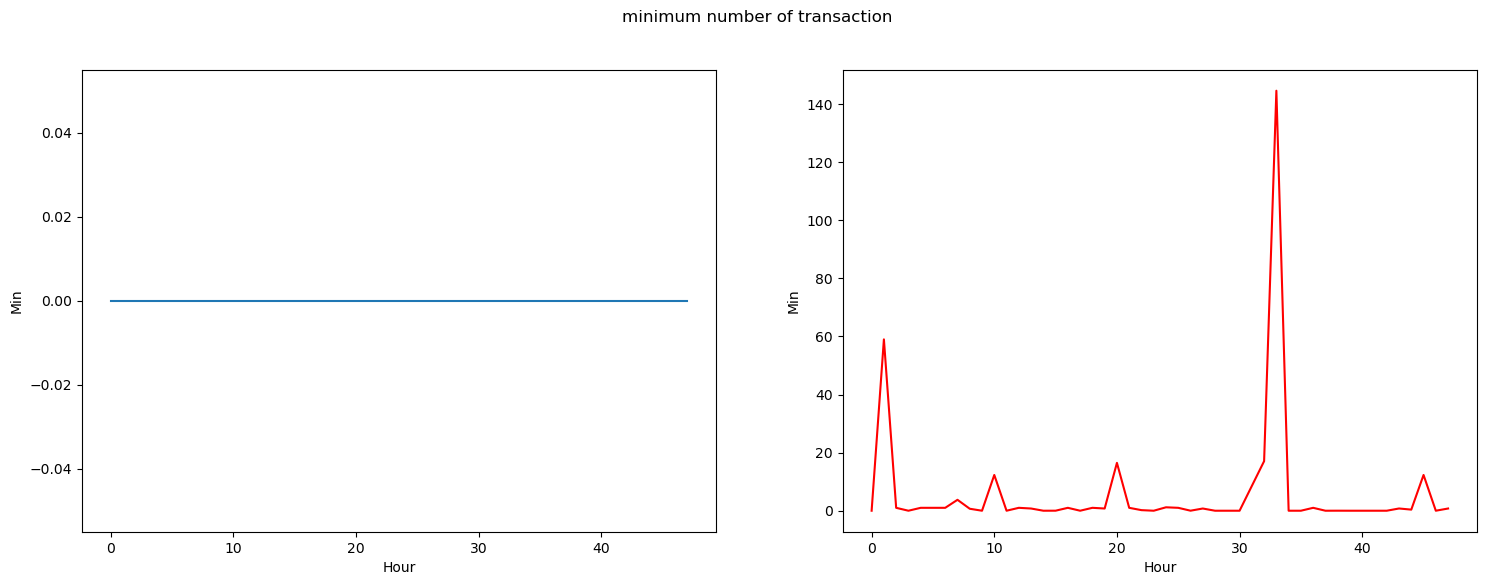

In [16]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize = (18,6))
s = sns.lineplot(ax=ax1,x = 'Hour',y = 'Min',data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2,x = 'Hour',y = 'Min',data=df.loc[df.Class==1],color = 'red')
plt.suptitle('minimum number of transaction')
plt.show()

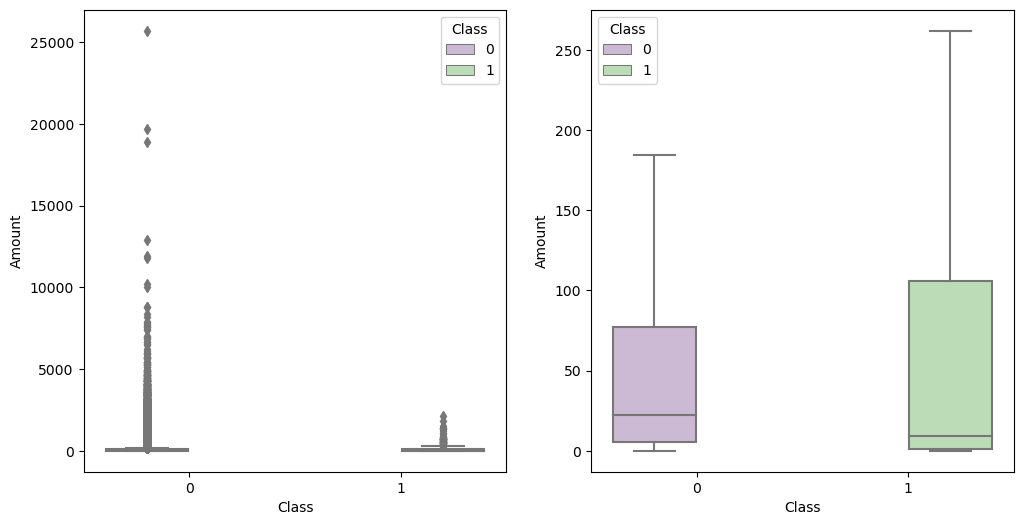

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn")
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show()


In [18]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class']==0]['Amount']
class_1 = tmp.loc[tmp['Class']==1]['Amount']
class_0.describe()



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

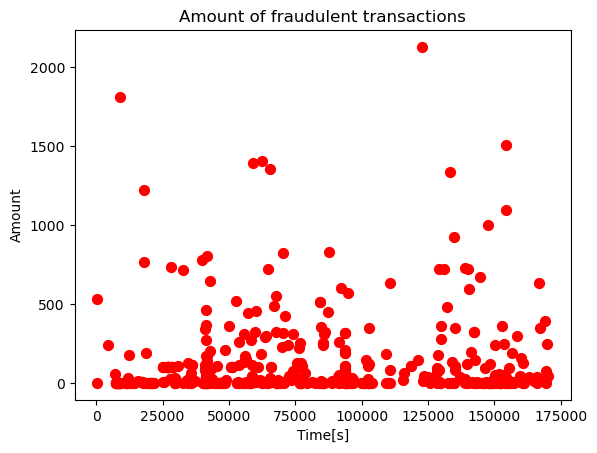

In [20]:

fraud = data.loc[data['Class'] == 1]
plt.scatter(fraud["Time"],fraud['Amount'],color = 'red',s=50)
plt.xlabel('Time[s]')
plt.ylabel('Amount')
plt.title('Amount of fraudulent transactions')


plt.show()


In [21]:
fraud = data.loc[data['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data1 = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data1, layout=layout)
iplot(fig, filename='fraud-amount')

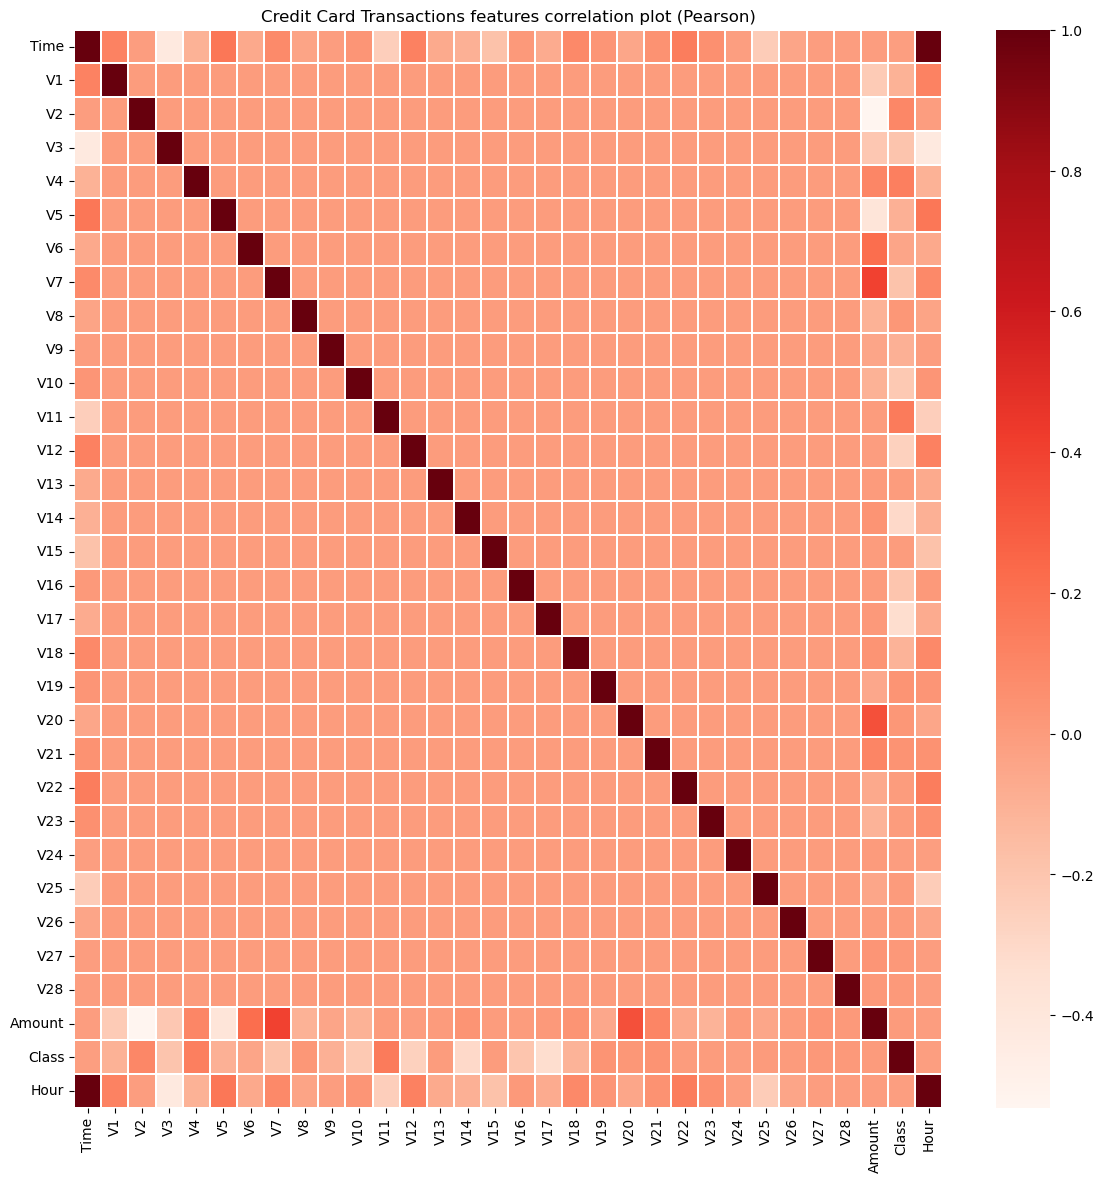

In [22]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()


<Figure size 640x480 with 0 Axes>

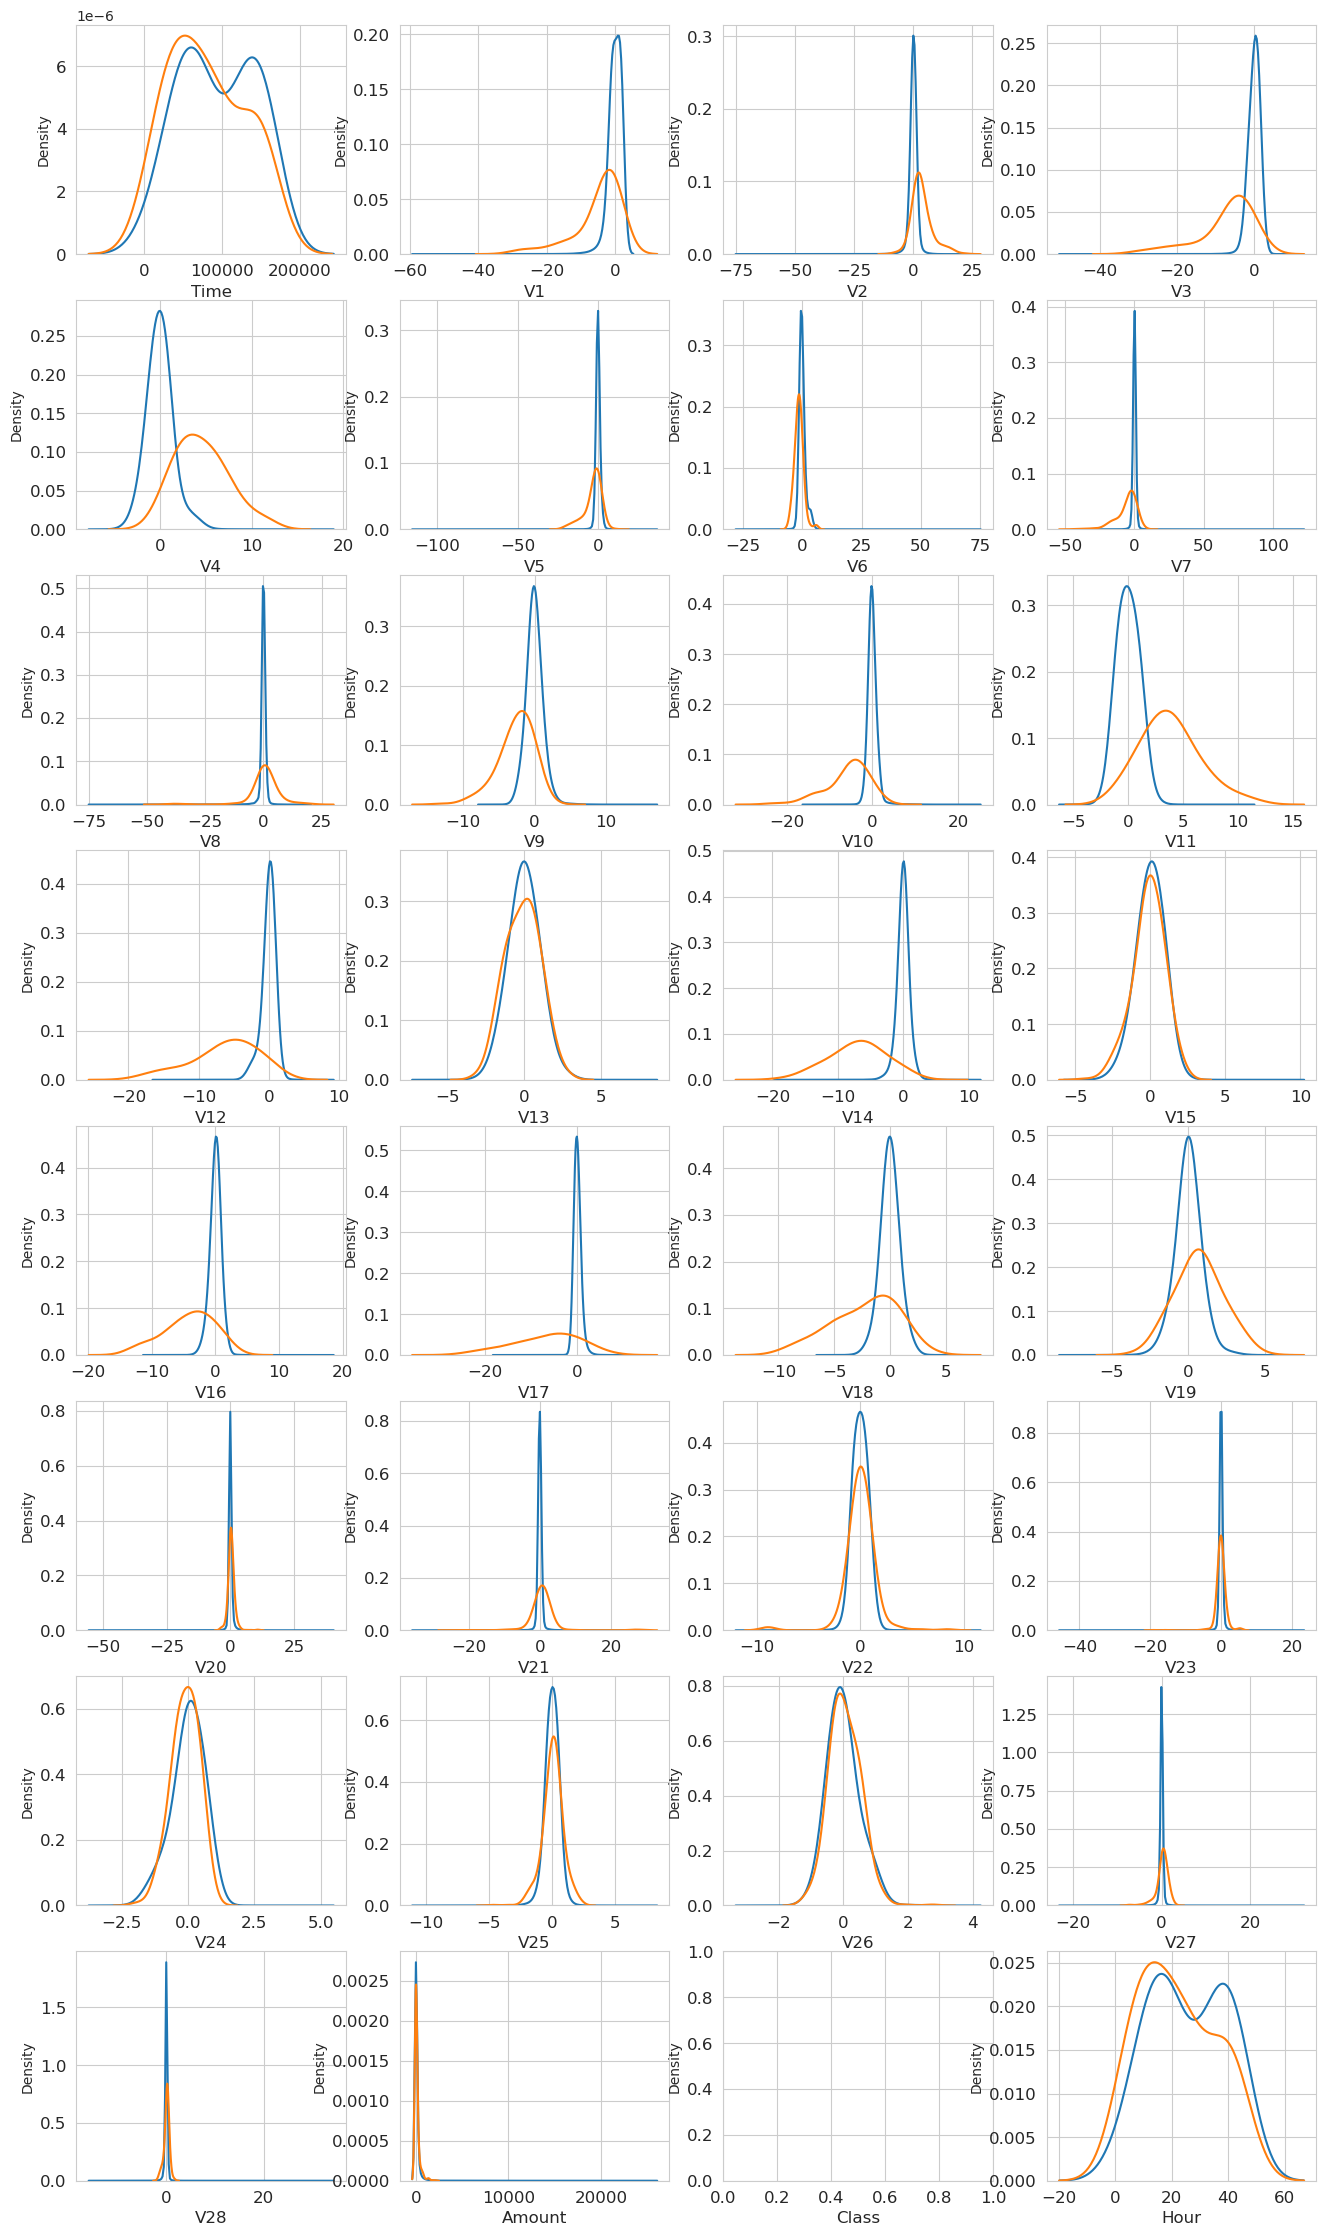

In [23]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [24]:
min_amount = data.loc[data['Amount'] != -np.inf, 'Amount'].min()
data.loc[data['Amount'] == -np.inf, 'Amount'] = min_amount
max_amount = data.loc[data['Amount'] != np.inf, 'Amount'].max()
data.loc[data['Amount'] == np.inf, 'Amount'] = max_amount

# **Feature Engineering**

In [25]:

from sklearn.preprocessing import StandardScaler
data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Amount']])


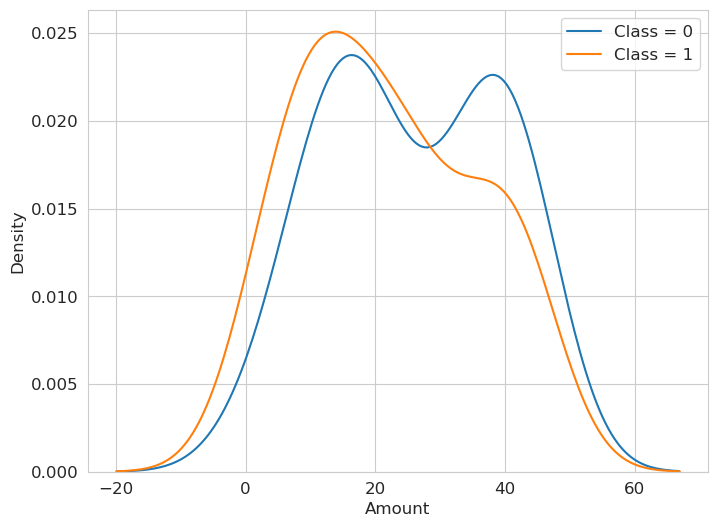

In [26]:
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.show()

In [27]:
!pip install imbalanced-learn

In [28]:
!pip install xgboost


# **Oversampling using SMOTE**

In [29]:
def re_sampling(x):
  # Select a random sample of non-fraud data points with size x
  df_nonfraud = data[ data.Class == 0 ].sample(x, random_state=0,replace = True)
  # Select all fraud data points
  df_fraud = data[ data.Class == 1 ]
  # Concatenate the non-fraud sample and all fraud data points, then shuffle the rows
  df_gen = pd.concat([df_nonfraud, df_fraud]).sample(frac=1)
  # Split the generated data into features (X_gen) and target (y_gen)
  X_gen = df_gen.drop('Class', axis=1)
  y_gen = df_gen.Class

  return X_gen,y_gen



In [30]:
x_sample = int(492 * 95 / 5) # 95% out of 492 where 492 represents 5% percent

X_under, y_under = re_sampling(x_sample)


<AxesSubplot:xlabel='Class', ylabel='count'>

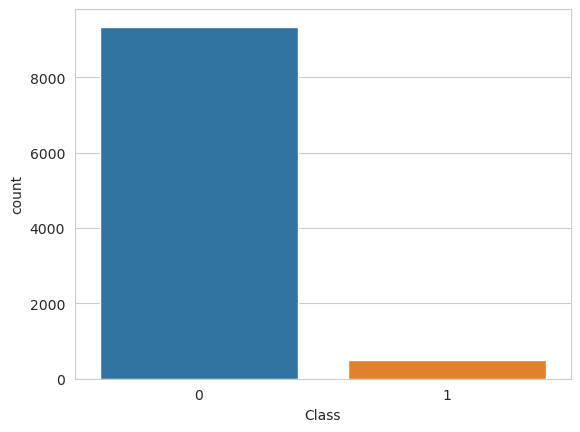

In [31]:
sns.countplot(x=y_under)

In [32]:
y_under.value_counts()

0    9348
1     492
Name: Class, dtype: int64

In [33]:
x_sample = int(492 * 80 / 20) # 80% out of 492 where 492 represents 20% percent

X_sub, y_sub = re_sampling(x_sample)

<AxesSubplot:xlabel='Class', ylabel='count'>

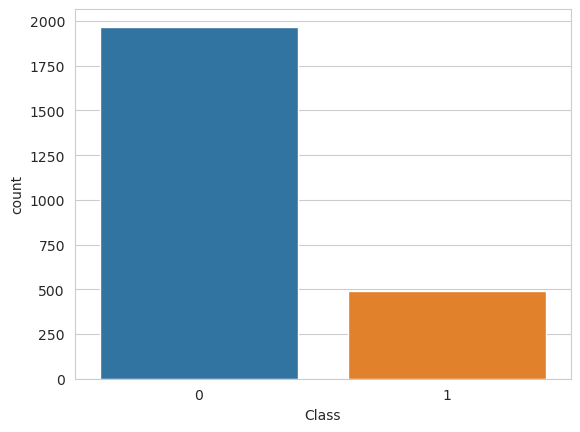

In [34]:
sns.countplot(x=y_sub)

In [35]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
X_gen, y_gen = re_sampling( 1000 )
# Impute missing values in X_gen
imputer = SimpleImputer(strategy='median')
X_gen_imputed = imputer.fit_transform(X_gen)

# Apply SMOTE to the imputed dataset
smote = SMOTE(random_state=0)
X_sdg, y_sdg = smote.fit_resample(X_gen_imputed, y_gen)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.547951,1.977825,0.001521,-1.795336,0.566220,0.050607,-1.500097,0.260396,-0.345066,0.746321,...,0.205733,0.623068,-0.053553,-0.113981,0.210844,-0.100773,-0.017296,-0.026468,-0.167558,33.000000
1,1.013879,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,...,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,-0.353229,39.000000
2,-0.602443,1.142903,0.199540,0.229170,1.096223,-0.140532,-0.494063,0.160056,-0.085422,0.020968,...,0.069877,0.200639,-0.092259,0.079799,0.593526,-0.300918,0.022580,0.021539,-0.215695,18.000000
3,1.546160,-5.497489,5.039235,-3.789954,-1.712074,-0.816790,-0.732232,-0.334685,1.575599,3.243455,...,-0.903265,-1.259728,0.346889,-0.014104,0.567257,0.106767,0.883519,0.120951,-0.313888,46.000000
4,0.911411,2.019857,0.041767,-1.623959,0.354859,0.291940,-0.688151,0.016307,-0.043346,0.375881,...,-0.312851,-0.880690,0.363522,0.641852,-0.347381,0.146084,-0.072767,-0.041070,-0.349671,38.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.815777,-2.147395,3.625077,-4.494190,2.716264,-2.095022,-2.323220,-4.207431,1.696292,-1.301496,...,0.639568,-0.505200,-0.003456,0.052523,0.093227,0.309018,0.541465,0.292549,-0.349231,2.000000
1996,-1.239540,-4.696825,5.362073,-6.364642,5.071872,-4.501015,-1.623664,-6.531698,3.422640,-5.022261,...,1.275567,-0.514419,0.153883,-0.164225,-0.285209,-0.238871,0.270050,0.410438,0.005148,9.000000
1997,1.320073,-1.671274,-2.487538,-6.038364,2.922047,-1.604172,-1.423053,0.034252,0.112859,-1.023406,...,1.101696,-0.826620,-1.007377,-0.552806,-0.021624,0.484504,0.183251,0.406250,4.696893,42.867481
1998,1.205398,-3.648442,3.289800,-7.299594,7.659539,-0.323293,-1.966486,-3.019183,-0.367125,-1.613381,...,0.534526,0.691900,0.329256,-0.617263,-0.337695,0.352178,-2.651562,0.432979,-0.349231,42.000000


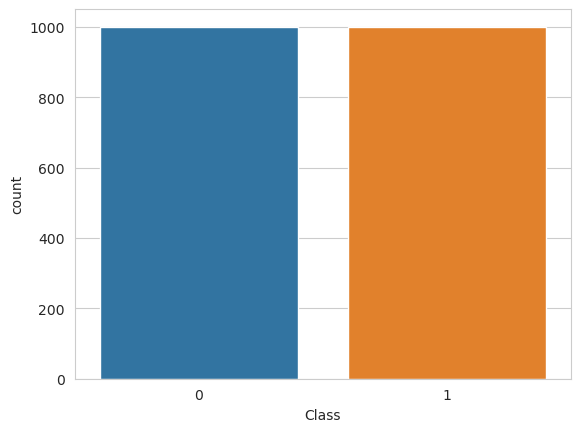

In [36]:
sns.countplot(x=y_sdg)
pd.DataFrame(X_sdg)

# **Modeling and Evaluation**

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from scipy.stats import uniform, randint

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sdg, y_sdg, test_size=0.2, random_state=42)

# Define the cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb_clf", xgb.XGBClassifier(objective="binary:logistic",eval_metric=average_precision_score ,n_jobs=-1, tree_method="hist", random_state=42))
])

# Define the hyperparameter space
params = {
    "xgb_clf__colsample_bytree": uniform(0.7, 0.1),
    "xgb_clf__gamma": uniform(0, 0.5),
    "xgb_clf__learning_rate": uniform(0.03, 0.5),
    "xgb_clf__max_depth": randint(2, 25),
    "xgb_clf__n_estimators": randint(100, 250),
    "xgb_clf__subsample": uniform(0.7, 0.3),
    "xgb_clf__max_delta_step": randint(1,10),
    "xgb_clf__reg_alpha": uniform(0, 1),
    "xgb_clf__reg_lambda": uniform(0, 1),
}

# Tune the hyperparameters using RandomizedSearchCV
rand_search = RandomizedSearchCV(pipeline, params, cv=kf, n_iter=20, scoring="average_precision", random_state=42)
rand_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rand_search.best_params_)

# Fit the model with the best hyperparameters on the training data
best_pipeline = rand_search.best_estimator_

# Add regularization parameters
best_pipeline.named_steps['xgb_clf'].set_params(reg_alpha=0.01, reg_lambda=1)

best_pipeline.fit(X_train, y_train)

# Get the predicted values on the test data
y_pred_best = best_pipeline.predict(X_test)

# Evaluate the performance of the model with best hyperparameters using cross-validation
cv_results = cross_val_score(best_pipeline, X_train, y_train, cv=kf, scoring="average_precision")
print("\nCross-validation results:", cv_results)
print("Mean cross-validation score:", cv_results.mean())

# Evaluate the performance of the model with best hyperparameters on the test data
print("\nConfusion matrix (best model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification report (best model):\n", classification_report(y_test, y_pred_best))
print("Accuracy (best model): ", accuracy_score(y_test, y_pred_best))
print("Precision (best model): ", precision_score(y_test, y_pred_best))
print("Recall (best model): ", recall_score(y_test, y_pred_best))
print("F1 Score (best model): ", f1_score(y_test, y_pred_best))
print("ROC-AUC Score (best model): ", roc_auc_score(y_test, y_pred_best))
print("PR-AUC Score (best model): ", average_precision_score(y_test, y_pred_best))

Best hyperparameters: {'xgb_clf__colsample_bytree': 0.722210781047073, 'xgb_clf__gamma': 0.0599326836668414, 'xgb_clf__learning_rate': 0.19880758570181398, 'xgb_clf__max_delta_step': 6, 'xgb_clf__max_depth': 10, 'xgb_clf__n_estimators': 212, 'xgb_clf__reg_alpha': 0.06489224710898156, 'xgb_clf__reg_lambda': 0.2539154139343447, 'xgb_clf__subsample': 0.7740628188515803}

Cross-validation results: [0.9974173  0.99620367 0.99873306 0.98791193 0.98987769]
Mean cross-validation score: 0.9940287323993673

Confusion matrix (best model):
 [[184   6]
 [ 11 199]]

Classification report (best model):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       190
           1       0.97      0.95      0.96       210

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Accuracy (best model):  0.9575
Precision (best model):  0.9707317073170731
Re